# Asset Performance Management

Scenario: We have been given data from a Chemical Processing plant that uses its equipement for heating and cooling the chemicals that it manufactures for its customers.

We have around 5 years of data for its pump, chilling units and heat exchangers. (These individual components are not critical for our purposes.)

**Goal**: But looking at the sensors and instrumented data over 5 years of history, we have to see if the asset is performing well, or whether we are seeing anomalies.


Input file for this task: `APM_Asset_operations.csv`

### Preparatory Tasks

1. Read the input file
2. Format the data into a proper time series (with datetime) Timestamps and floats for the sensor values
3. Plot each of the sensors

### Anomaly Detection
4. Are you able to spot (visually) any anomalies?
5. Could there be threshold values that are being violated (above or below control limits?) for 'normal' operation?
5a. How to set thresholds to detect any of these anomalies.

6. (Optional): Can you try applying any of the `skelarn` outlier detection techniques? Does that catch the anomalies we say visually.

## Questions

* Focus on `Fuel Pressure`, `Lubricant Temperature` and `Tank Level`?
    * What metrics could we apply to these?
* Insights: Can we conclude that there are any alarms or anomalies in the data that we are examining?
* If you compute the rolling mean (moving averages) for these values and overlay them with the data, can you detect any anomalies?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
%matplotlib inline

## Data Prep Tasks

In [3]:
# load all files into separate dataframes
nodes = pd.read_csv('APM_Asset_operations.csv', encoding='utf-8')

In [4]:
# view top few rows
nodes.head()

,Time,Rotor_shaft_speed,Unit_Speed_RPM,Lower_shaft_speed,Line_Speed_RPM,Pressure_diff1,Pressure_diff2,Pressure_diff3,Pressure_loss,Inlet_Avg_Temp,Discharge_Avg_Temp,Discharge_Pressure,Outlet_Avg_Temp,Fuel_pressure,Lubricant_Temp,Oil_tank_level
0,1/30/13 0:00,99.9686,5098.3989,101.1093,4721.8066,77.7725,76.7162,76.3368,167.0344,22.3443,329.2889,8.8556,492.9221,19.8115,54.6645,68.6119
1,1/30/13 1:00,99.9924,5099.6123,101.5489,4742.333,78.2751,76.8406,77.2332,167.0796,22.1642,329.437,8.8732,494.634,19.7604,54.6888,68.3893
2,1/30/13 2:00,99.9839,5099.1792,101.5569,4742.708,76.9854,76.0533,75.9253,167.3895,22.114,328.9085,8.8686,493.6359,19.7733,54.7309,68.3634
3,1/30/13 3:00,100.0077,5100.3926,102.1171,4768.8687,78.2802,77.3913,77.0074,168.4393,21.4434,328.3918,8.9081,493.5725,19.7667,54.6808,68.2874
4,1/30/13 4:00,99.9924,5099.6123,102.1025,4768.1865,77.3884,76.7575,76.1018,168.6652,21.0625,328.3006,8.9256,494.1184,19.7841,54.5959,68.4671


In [5]:
# check columns and types
nodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44002 entries, 0 to 44001
Data columns (total 16 columns):
Time                  44002 non-null object
Rotor_shaft_speed     44002 non-null object
Unit_Speed_RPM        44002 non-null object
Lower_shaft_speed     44002 non-null object
Line_Speed_RPM        44002 non-null object
Pressure_diff1        44002 non-null object
Pressure_diff2        44002 non-null object
Pressure_diff3        44002 non-null object
Pressure_loss         44002 non-null object
Inlet_Avg_Temp        44002 non-null object
Discharge_Avg_Temp    44002 non-null object
Discharge_Pressure    44002 non-null object
Outlet_Avg_Temp       44002 non-null object
Fuel_pressure         44002 non-null object
Lubricant_Temp        44002 non-null object
Oil_tank_level        44002 non-null object
dtypes: object(16)
memory usage: 5.4+ MB


In [6]:
# convert timestamps to datetime 
nodes['Time'] = pd.to_datetime(nodes['Time'])

In [7]:
# set index
nodes.index = nodes['Time']

In [8]:
# convert rest to numeric float
cols = nodes.columns.drop('Time')
nodes[cols] = nodes[cols].apply(pd.to_numeric, errors='coerce')

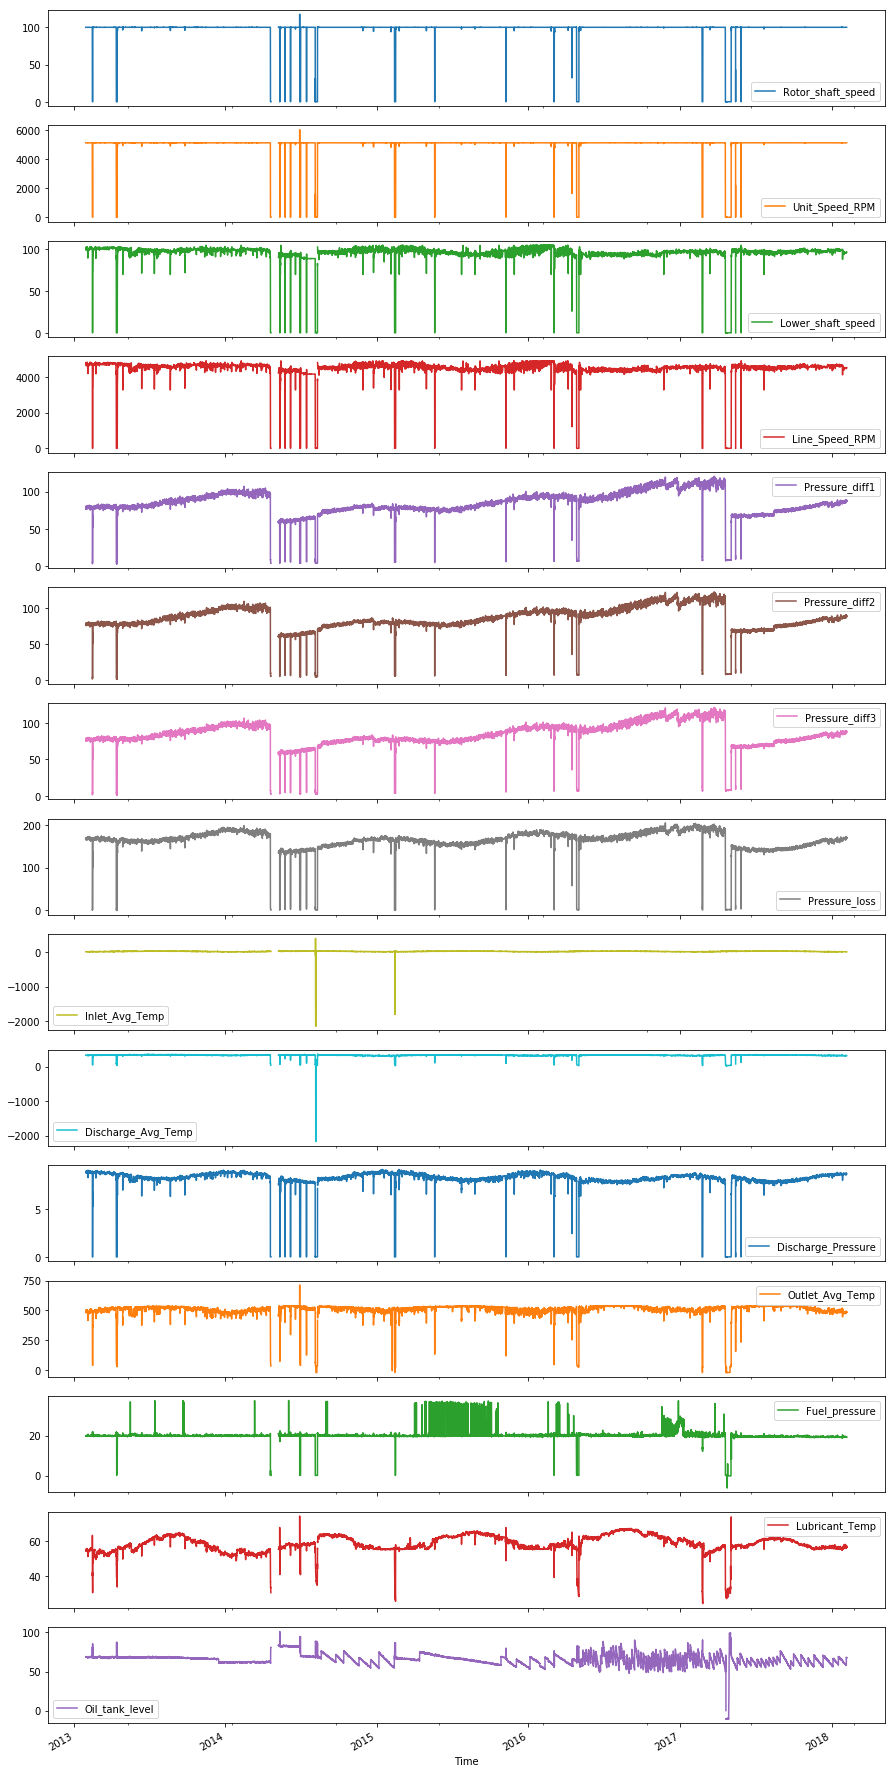

In [17]:
# plot all the columns versus time index
nodes[cols].plot(subplots=True,figsize=(15, 35));

## Anomaly Detection Tasks

Question 4: Are you able to spot (visually) any anomalies?

* <b>You can see variations in the data. You can suspect anomaloes with some of the extreme variations in the data - but that could be normal depending on the process.


Question 5: Could there be threshold values that are being violated (above or below control limits?) for 'normal' operation? 

* T<b>here could be thresholds that are being violated. </b>

Question 5a. How to set thresholds to detect any of these anomalies?
* <b>You could use an algorithm in scikit learn that could help identify the anomalies outside thresholds. One would have to determine the threshold to do this.

Question 6(Optional): Can you try applying any of the skelarn outlier detection techniques? Does that catch the anomalies we say visually

# Conclusions and Recommendations

Questions:

Insights: Can we conclude that there are any alarms or anomalies in the data that we are examining? 
* <b>Not by just looking at the graphs. Some further analysis needs to done.</b>
    
If you compute the rolling mean (moving averages) for these values and overlay them with the data, can you detect any anomalies?
* <b>The graphs are plotted below - you could see the variation from the rolling averages if you zoom into the graphs. You could assume some anomalies yes.</b>

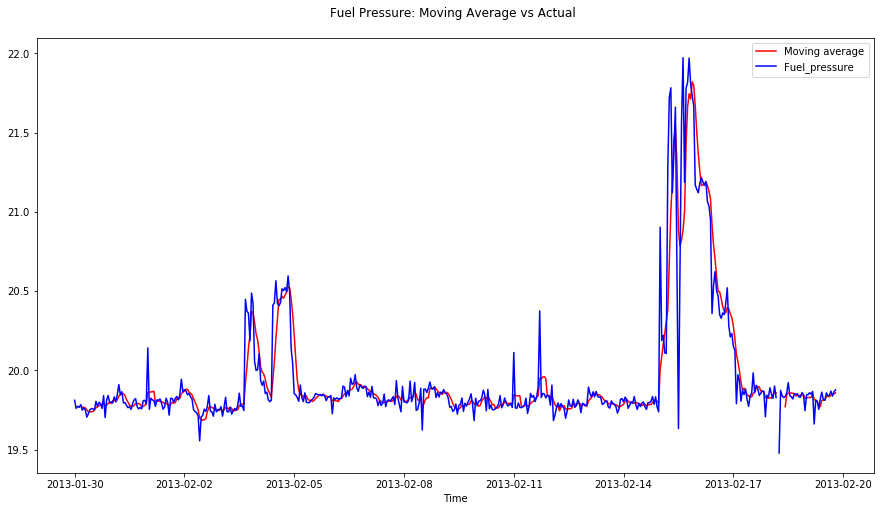

In [118]:
# import needed library
from numpy import convolve

# define function to calculate moving average
def movingaverage (values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma
 
# view top 500 rows for clearer view 
x = nodes.index[0:500]
y = nodes.iloc[0:500, -3]
 
yMA = movingaverage(y,5)

#print yMA
plt.figure(figsize=(15, 8))
plt.plot(x[len(x)-len(yMA):],yMA, label = "Moving average", color = "red")
plt.plot(x,y, color = "blue")
plt.title("Fuel Pressure: Moving Average vs Actual \n")
plt.xlabel("Time")
plt.legend()
plt.show()

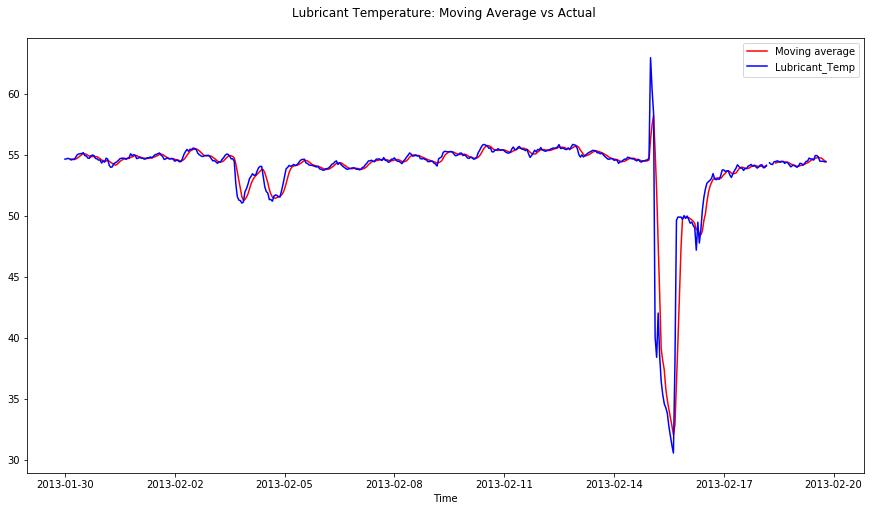

In [116]:
# view top 500 rows for clearer view 
x = nodes.index[0:500]
y = nodes.iloc[0:500, -2]
 
yMA = movingaverage(y,5)

#print yMA
plt.figure(figsize=(15, 8))
plt.plot(x[len(x)-len(yMA):],yMA, label = "Moving average", color = "red")
plt.plot(x,y, color = "blue")
plt.title("Lubricant Temperature: Moving Average vs Actual \n")
plt.xlabel("Time")
plt.legend()
plt.show()

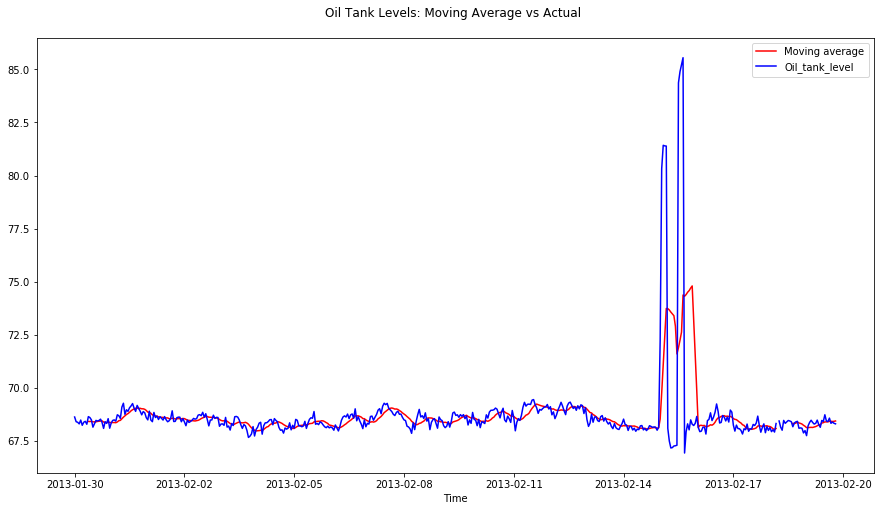

In [117]:
# view top 500 rows for clearer view 
x = nodes.index[0:500]
y = nodes.iloc[0:500, -1]
 
yMA = movingaverage(y,10)

#print yMA
plt.figure(figsize=(15, 8))
plt.plot(x[len(x)-len(yMA):],yMA, label = "Moving average", color = "red")
plt.plot(x,y, color = "blue")
plt.title("Oil Tank Levels: Moving Average vs Actual \n")
plt.xlabel("Time")
plt.legend()
plt.show()